In [19]:
import pandas as pd


In [20]:
df = pd.read_csv('car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [21]:
df.shape

(301, 9)

In [22]:
print(df['Seller_Type'].unique())
print(df['Transmission'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [23]:
#cheking Missing Values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [25]:
#Creating dataset with only features required so removing carn name as it would not play a major role in the analysis, then say price.

final_dataset = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

final_dataset.head()



,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [26]:
#creating new feature current year 
final_dataset['Current Year'] = 2020
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020


In [27]:
#creating a new cvolumn for how old a car is by Current year - Year

final_dataset['no_years'] = final_dataset['Current Year'] - final_dataset['Year']
final_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_years
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [28]:
final_dataset.drop(['Year'], axis = 1, inplace = True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current Year,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [29]:
#dropping Current year as it was only used to get number of years teh car is old could be used

final_dataset.drop(['Current Year'], axis = 1, inplace = True)
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [30]:
# one Hot Encoding 

final_dataset = pd.get_dummies(final_dataset,drop_first = True)

In [31]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [32]:
#Correlation

final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


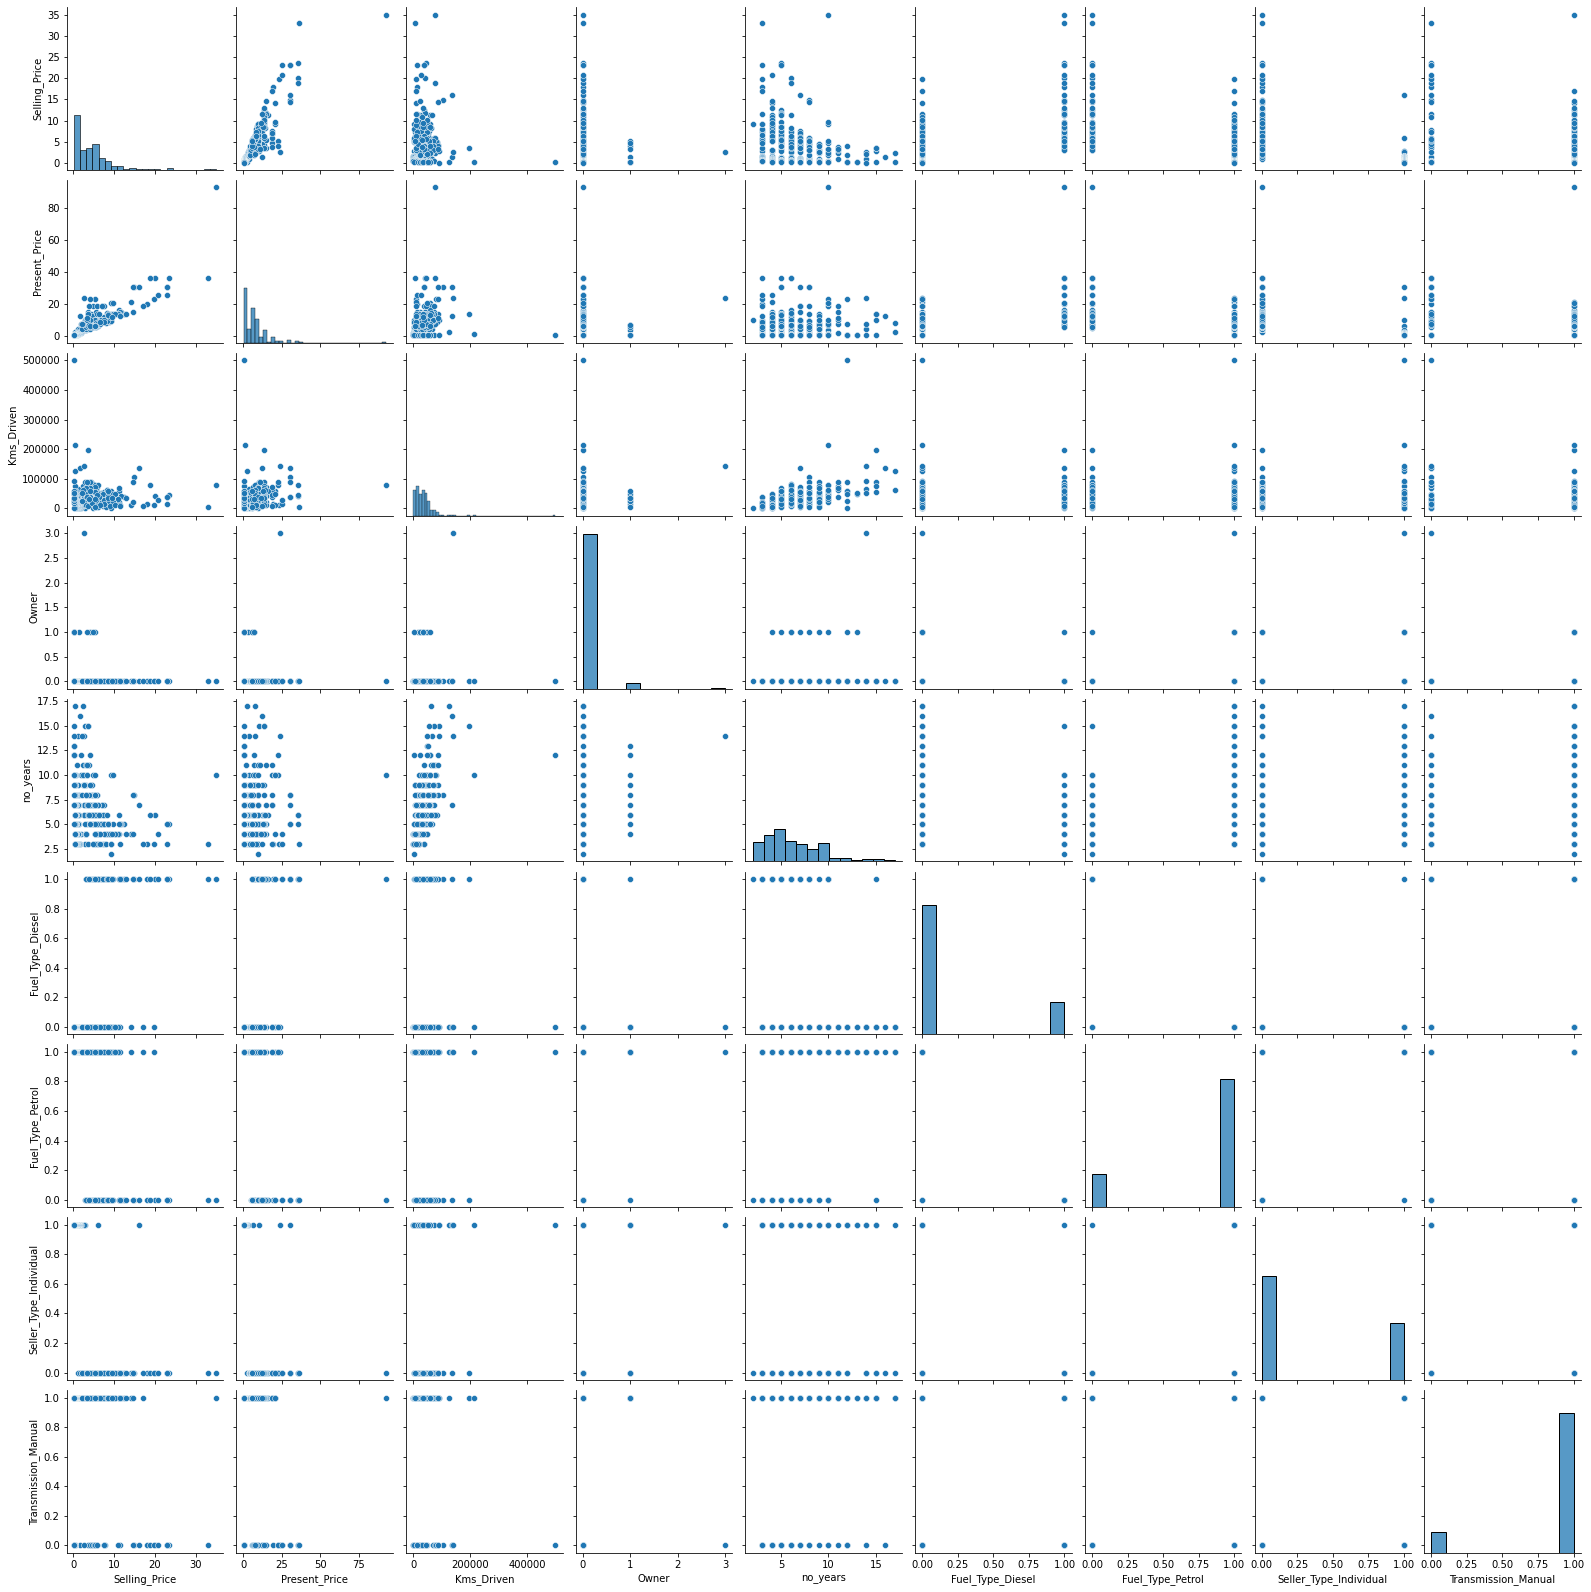

In [33]:
import seaborn as sns
#sns.pairplot(final_dataset)

In [34]:
import matplotlib.pyplot as plt 



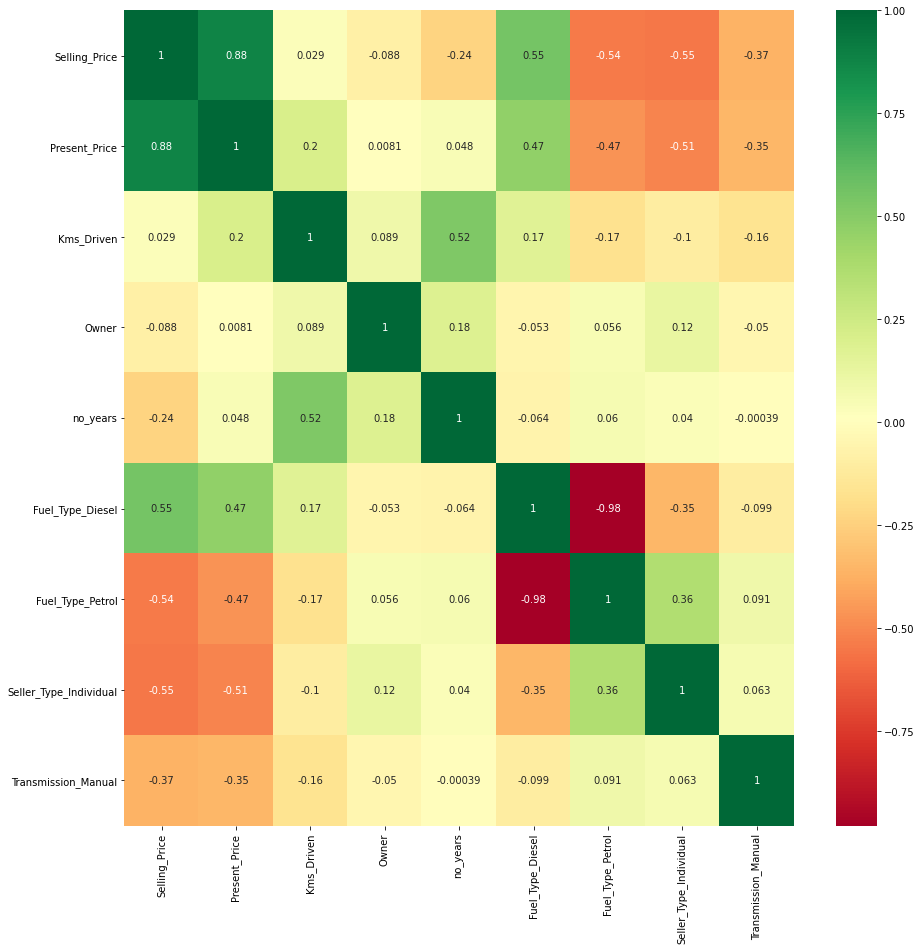

In [35]:
cormat = final_dataset.corr()
top_corr_features = cormat.index 
plt.figure(figsize = (15,15))

#plotting heatmap

g = sns.heatmap(final_dataset[top_corr_features].corr(), annot = True , cmap = 'RdYlGn')

In [36]:
#independent Featuer eand Dependent Feature

X= final_dataset.iloc[:,1:]
y = final_dataset.iloc[:,0]

In [37]:
X.head()


,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,0,1,0,1
1,9.54,43000,0,7,1,0,0,1
2,9.85,6900,0,3,0,1,0,1
3,4.15,5200,0,9,0,1,0,1
4,6.87,42450,0,6,1,0,0,1


In [38]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [39]:
##Featuer Importance

from sklearn.ensemble import ExtraTreesRegressor
model  = ExtraTreesRegressor()  ## have to initialize all methods of sklearn while importing

model.fit(X,y)

ExtraTreesRegressor()

In [40]:
print(model.feature_importances_)

#so the conclusion goes like my selling prie is the most imp feature and then disel_type holds importance

[0.37578863 0.03995812 0.00040411 0.07815597 0.22603332 0.01051722
 0.13415882 0.13498382]


<AxesSubplot:>

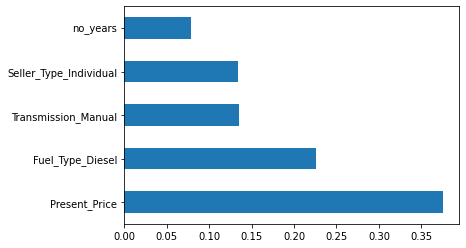

In [41]:
#plotting graph of feautre importance for visulaization

feat_importances = pd.Series(model.feature_importances_,index = X.columns)
feat_importances.nlargest(5).plot(kind = 'barh')

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

In [43]:
X_train.head()

,Present_Price,Kms_Driven,Owner,no_years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
39,7.98,62000,0,17,0,1,0,1
115,1.47,17500,0,5,0,1,1,1
98,18.61,45000,0,7,0,1,0,1
116,1.47,33000,0,7,0,1,1,1
239,4.43,23709,0,8,0,1,0,1


In [45]:
from sklearn.ensemble._forest import RandomForestRegressor
regressor = RandomForestRegressor()

In [46]:
### Hyper Parameters

import numpy as np
#No. of Trees in Random Forest
n_estimators = [int(x) for x in np.linspace(100,1200,12)]

#No of features to consider at every split
max_features = ['auto', 'sqrt']
        

#Max. no. of Levels in the tree
max_depth = [int(x) for x in np.linspace(5, 30, 6)]

#Min sample split for each node
min_samples_split = [2,5,10,15,100]

#Min no. of samples required at each leaf node
min_samples_leaf = [1,2,5,10]

In [47]:
from sklearn.model_selection import RandomizedSearchCV


In [48]:
#Creating the Random Grid

random_grid = {'n_estimators': n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
#using Custom Grid to select best hyperparameters
#creating first a base model

rf = RandomForestRegressor()

In [50]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions= random_grid,scoring = 'neg_mean_squared_error', n_iter= 10, cv = 5, verbose= 2, random_state= 42, n_jobs= 1)

In [51]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   8.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [52]:
predictions = rf_random.predict(X_test)

In [53]:
predictions

array([ 0.43256594, 10.30747475, 10.51701945,  7.49238904,  1.14793958,
        2.81439896,  9.87744573,  5.4652999 ,  3.76278126,  1.13336812,
        4.62627498,  1.24372533,  5.56464386,  6.11261597,  6.11040169,
        0.44167879, 20.50028372,  5.59302087, 10.44118213,  7.58692523,
        0.50063705,  6.5729224 ,  5.71224506, 10.30747475,  7.0045446 ,
        3.02545685, 10.55142866,  3.63140082, 10.43612652,  0.57509283,
        3.95629473,  0.43607227,  3.26032859,  4.56453986,  4.60649809,
        0.43990452,  5.7350876 ,  9.3368186 ,  6.99587654, 20.3453878 ,
        4.60463283,  2.51023629, 10.25201818,  0.22665552,  2.96295235,
        1.24372533,  3.9113282 ,  1.13621277,  5.68415929,  3.74282694,
        0.23618107,  5.64894942,  0.30439667,  6.99044712,  5.45952276,
        9.35559843,  7.19658361,  0.47086297,  3.25458126,  2.75651479,
        1.1485021 ])

/home/saurabh/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

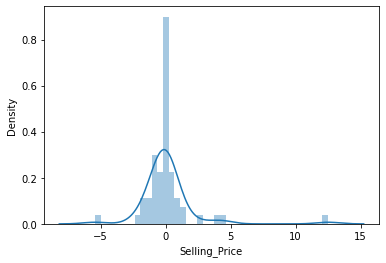

In [54]:
#There are some distortions but it still is a normal Gaussian Distribution
sns.distplot(y_test - predictions)

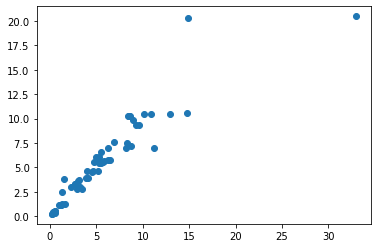

In [55]:
#Forming a Linear line shows that model is working good.

plt.scatter(y_test,predictions)

In [56]:
import pickle 

file = open('random_forest_regression_model.pkl', 'wb')

pickle.dump(rf_random, file)

file.close()